In [ ]:
!pip install geopandas

In [ ]:
pip install geoplot

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
data=pd.read_excel('鄉鎮市ATM_綜所稅.xlsx')

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

In [7]:
data.head()

,Unnamed: 0,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,Total_ATM,lat,lng,綜合所得總額
0,0,G09,10002030,宜蘭縣,蘇澳鎮,Suao Township,G,10002,384396,1008.511063,4995.604699,6343396.0
1,1,G07,10002090,宜蘭縣,五結鄉,Wujie Township,G,10002,346898,765.215099,3775.600756,7606077.0
2,2,G01,10002010,宜蘭縣,宜蘭市,Yilan City,G,10002,871369,2524.892553,12418.847330,20334332.0
3,3,G04,10002060,宜蘭縣,壯圍鄉,Zhuangwei Township,G,10002,96815,222.842314,1096.115919,3661688.0
4,4,G06,10002020,宜蘭縣,羅東鎮,Luodong Township,G,10002,719742,1949.506808,9619.749514,15189084.0


In [10]:
town_TA = gpd.read_file('TOWN_MOI_1081121.shp', encoding='utf-8')
town_TA

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."
...,...,...,...,...,...,...,...,...
363,D22,67000150,臺南市,七股區,Qigu District,D,67000,"POLYGON ((120.13989 23.19585, 120.14003 23.195..."
364,D23,67000160,臺南市,將軍區,Jiangjun District,D,67000,"POLYGON ((120.08374 23.24056, 120.08470 23.239..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.22256 24.94984, 121.22259 24.949..."
366,E02,64000020,高雄市,鼓山區,Gushan District,E,64000,"POLYGON ((120.27878 22.67380, 120.27891 22.673..."


#第一題

In [17]:
town_TA = gpd.read_file('TOWN_MOI_1081121.shp', encoding='utf-8')
town_A_no = town_TA.merge(data.groupby('TOWNNAME').sum()['綜合所得總額'], left_on=('TOWNNAME'), right_on=('TOWNNAME'))
town_A_no.sort_values('綜合所得總額')[::-1].head(10)

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,綜合所得總額
278,B02,66000020,臺中市,東區,East District,B,66000,"POLYGON ((120.69232 24.15270, 120.69247 24.152...",198876309.5
277,D01,67000320,臺南市,東區,East District,D,67000,"POLYGON ((120.21638 22.96505, 120.21636 22.965...",198876309.5
276,O01,10018010,新竹市,東區,East District,O,10018,"POLYGON ((120.97884 24.82430, 120.98675 24.822...",198876309.5
275,I01,10020010,嘉義市,東區,East District,I,10020,"POLYGON ((120.45882 23.45403, 120.45875 23.453...",198876309.5
153,A02,63000030,臺北市,大安區,Da'an District,A,63000,"POLYGON ((121.54384 25.04491, 121.54407 25.044...",189384104.5
154,B22,66000220,臺中市,大安區,Da'an District,B,66000,"POLYGON ((120.63702 24.37936, 120.63738 24.378...",189384104.5
315,F14,65000010,新北市,板橋區,Banqiao District,F,65000,"POLYGON ((121.47842 25.03984, 121.47861 25.039...",146972044.0
298,H01,68000010,桃園市,桃園區,Taoyuan District,H,68000,"POLYGON ((121.30171 25.03317, 121.30180 25.033...",126472306.0
349,A14,63000100,臺北市,內湖區,Neihu District,A,63000,"POLYGON ((121.59359 25.11515, 121.59368 25.115...",122523584.5
308,A10,63000040,臺北市,中山區,Zhongshan District,A,63000,"POLYGON ((121.54147 25.09287, 121.54155 25.092...",121125449.5


@由上述的資料可看出台中、 台南、 新竹、 嘉義 的東區為綜合所得總額最高的四個區 數字都為198876309.5

@較為怪異的為台中市大安區 偏遠地區但綜合所得總額很高 可能代表較為富有市民或是地方勢力、居住在該區

Text(0.5, 1.0, '台灣各鄉鎮市區綜合所得總額之分布狀況')

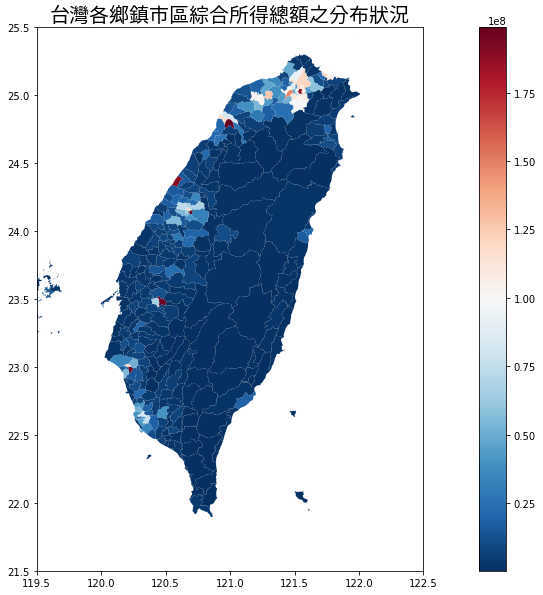

In [ ]:
SA=town_A_no.plot(column='綜合所得總額',cmap='RdBu_r', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("台灣各鄉鎮市區綜合所得總額之分布狀況",fontproperties=myfont,fontsize=20)

@由上述程式碼可看出綜合所得總額偏高的鄉鎮集中在台北及新北地區

@也可看出各縣市會有一些所得偏高的鄉鎮



#第二題

Text(0.5, 0, '各縣市區綜合所得總額之分布狀況')

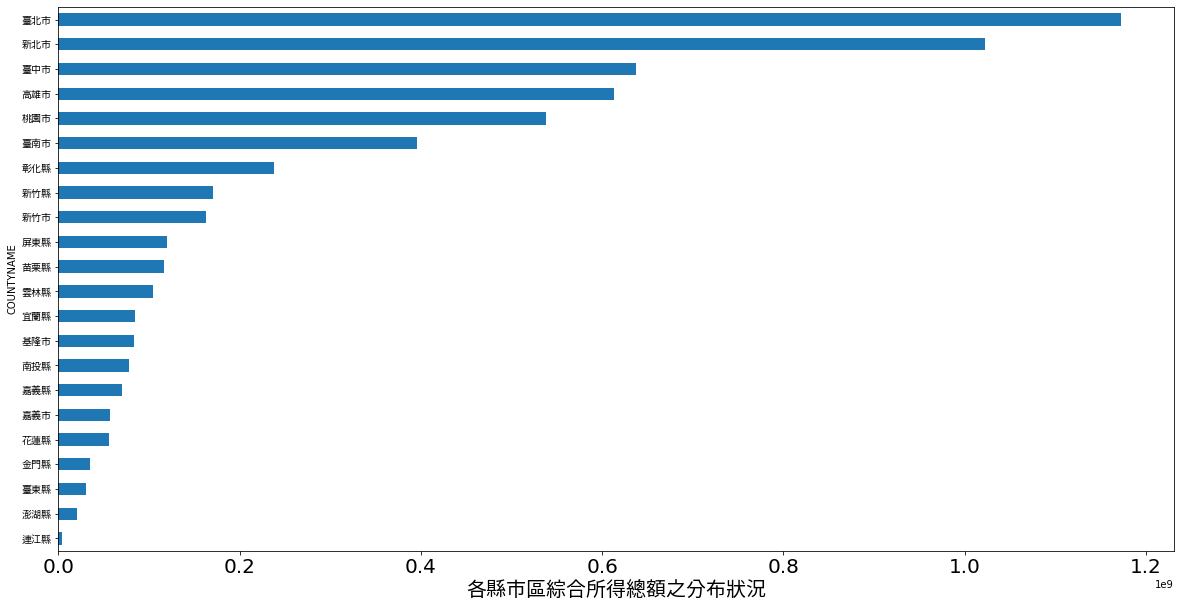

In [ ]:
axes = data.groupby('COUNTYNAME').sum().sort_values('綜合所得總額')['綜合所得總額'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('各縣市區綜合所得總額之分布狀況',fontproperties=myfont,fontsize=20)

@由上述程式碼可看出六都的綜合所得總額分布佔很大的優勢

@中北地段的縣市可看出綜合所得總額都是偏高的狀態

@可看出較後面的縣市幾乎分布在東部或是離島地區，花蓮、台東、金門、澎湖、連江等

#第三題

In [24]:
town_A_no1 = town_TA.merge(data.groupby('TOWNNAME').sum()['Total_ATM'], left_on=('TOWNNAME'), right_on=('TOWNNAME'))
town_A_no1.sort_values('Total_ATM')[::-1].head(10)

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,Total_ATM
278,B02,66000020,臺中市,東區,East District,B,66000,"POLYGON ((120.69232 24.15270, 120.69247 24.152...",7232779
277,D01,67000320,臺南市,東區,East District,D,67000,"POLYGON ((120.21638 22.96505, 120.21636 22.965...",7232779
276,O01,10018010,新竹市,東區,East District,O,10018,"POLYGON ((120.97884 24.82430, 120.98675 24.822...",7232779
275,I01,10020010,嘉義市,東區,East District,I,10020,"POLYGON ((120.45882 23.45403, 120.45875 23.453...",7232779
315,F14,65000010,新北市,板橋區,Banqiao District,F,65000,"POLYGON ((121.47842 25.03984, 121.47861 25.039...",5209804
308,A10,63000040,臺北市,中山區,Zhongshan District,A,63000,"POLYGON ((121.54147 25.09287, 121.54155 25.092...",4977725
307,C05,10017050,基隆市,中山區,Zhongshan District,C,10017,"POLYGON ((121.71744 25.16695, 121.71737 25.166...",4977725
297,H03,68000020,桃園市,中壢區,Zhongli District,H,68000,"POLYGON ((121.18542 25.02254, 121.18542 25.022...",4675311
298,H01,68000010,桃園市,桃園區,Taoyuan District,H,68000,"POLYGON ((121.30171 25.03317, 121.30180 25.033...",4663416
255,D04,67000340,臺南市,北區,North District,D,67000,"POLYGON ((120.23308 22.99850, 120.23303 22.998...",4258522


@由上述的資料可看出台中、 台南、 新竹、 嘉義 的東區為Total_ATM最高的四個區 數字都為7232779

Text(0.5, 1.0, '台灣各鄉鎮市區ATM數量之分布狀況')

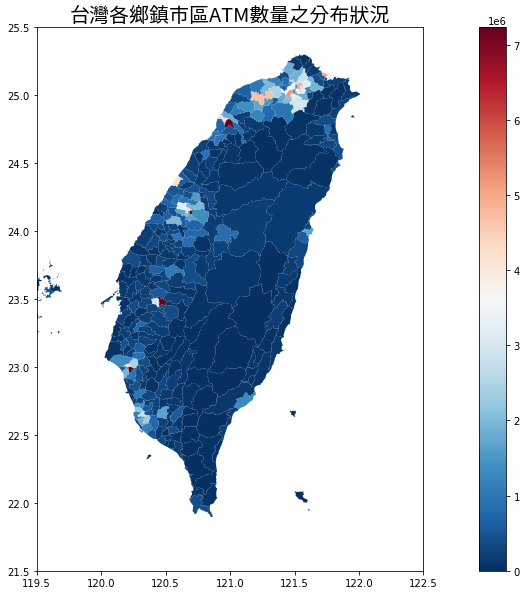

In [ ]:
SA=town_A_no1.plot(column='Total_ATM',cmap='RdBu_r', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("台灣各鄉鎮市區ATM數量之分布狀況",fontproperties=myfont,fontsize=20)

@由上述程式碼可看出ATM數量偏高的鄉鎮集中在台北及新北地區

@也可看出各縣市會有一些特別的鄉鎮ATM數量偏高

#第四題

Text(0.5, 0, '台灣各鄉鎮市區ATM數量之分布狀況')

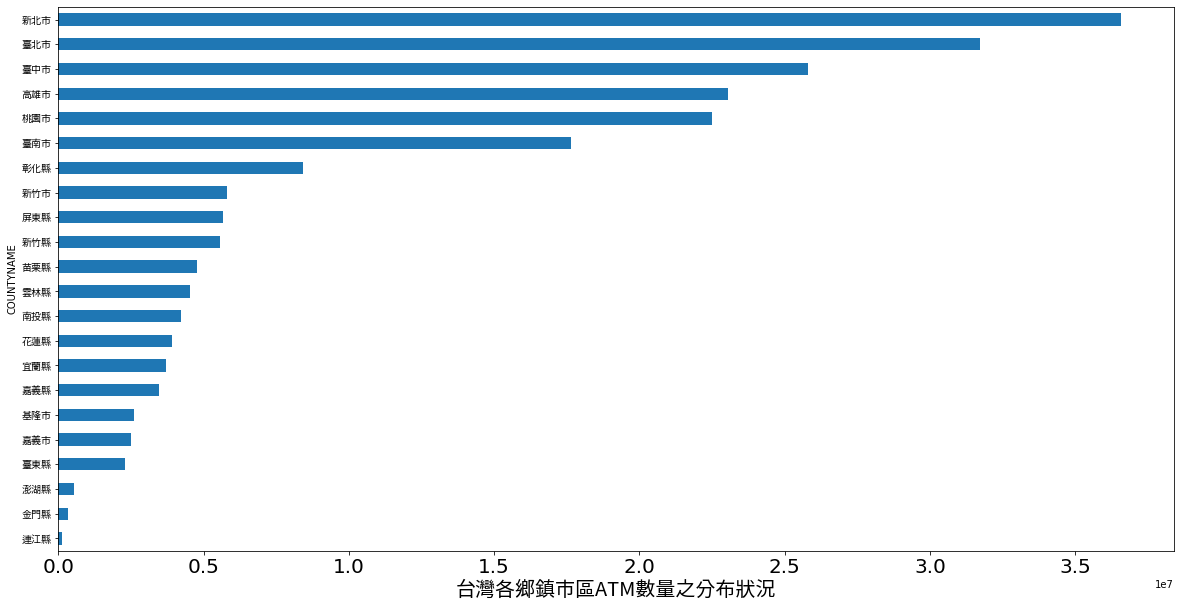

In [ ]:
axes = data.groupby('COUNTYNAME').sum().sort_values('Total_ATM')['Total_ATM'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('台灣各鄉鎮市區ATM數量之分布狀況',fontproperties=myfont,fontsize=20)

@由上述程式碼可看出六都的ATM數量非常多

@可看出圖中ATM數量較後面的縣市幾乎分布在較為偏遠地區或是離島地區基隆，台東、金門、澎湖、連江等 推測是因人少與地理位置關係

@較為怪異的是嘉義市 以上圖來看嘉義市的ATM數量跟其他縣市比屬後半段，但嘉義市東區ATM數量為全台各區總數第四名，由此判斷出嘉義市ATM集中在東區